In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set_palette(sns.palettes.hls_palette(4))

In [3]:
from kid_readout.measurement.io.easync import EasyNetCDF4

In [4]:
nc = EasyNetCDF4('/artemis/readout/hwp_mapping/2016-05-11_133655.nc')

In [5]:
mapg = getattr(nc,nc.groups.keys()[0])

In [6]:
x = mapg.x[:]
y = mapg.y[:]
hwp_steps = mapg.hwp_step[:]
hwp_degrees = hwp_steps*360./400.
mmw_frequency = mapg.mmw_frequency[:]
z = mapg.z[:]

In [7]:
z.shape

(3, 3, 108, 200)

In [8]:
ffz = np.fft.rfft(z[:,:,:100,:],axis=2)

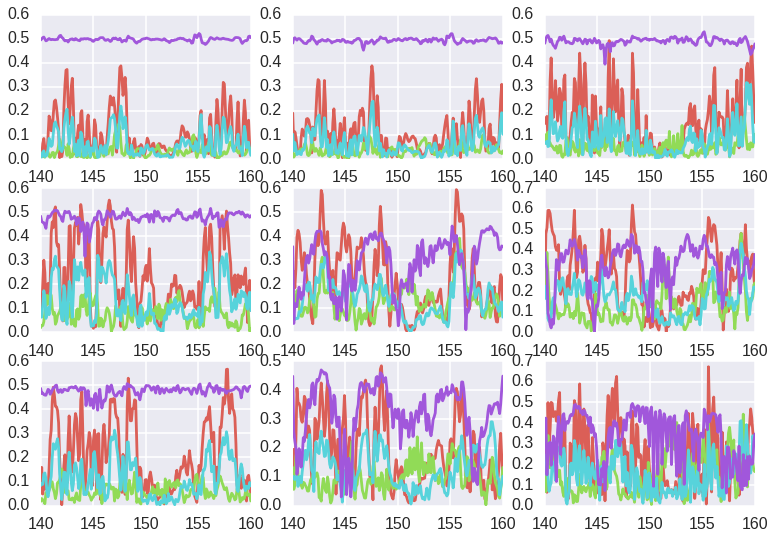

In [9]:
fig,axs = subplots(3,3)
for xidx,xx in enumerate(x):
    for yidx,yy in enumerate(y):
        ax = axs[yidx,xidx]
        ax.plot(mmw_frequency/1e9,np.abs(ffz[xidx,yidx,1:5,:]/ffz[xidx,yidx,0,:]).T)

In [18]:
x.argsort()

array([1, 0, 2])

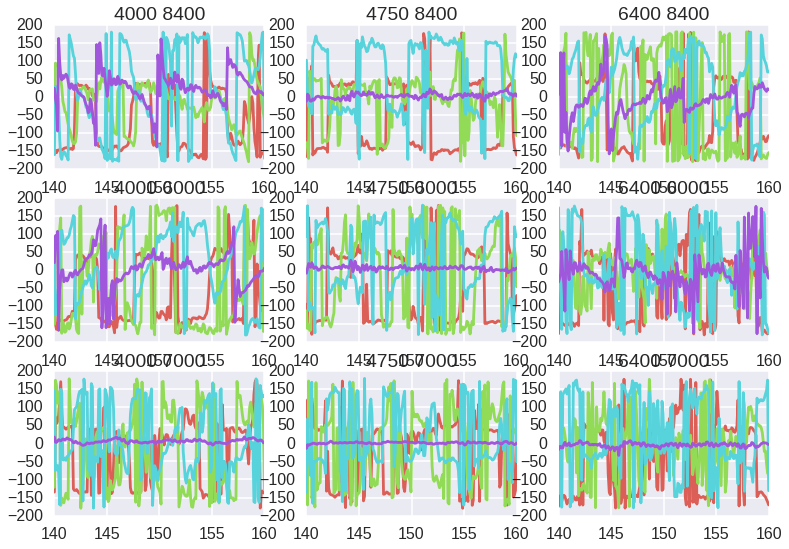

In [21]:
fig,axs = subplots(3,3)
for ax_xidx,xidx in zip(x.argsort(),range(len(x))):
    for ax_yidx,yidx in zip(y.argsort(),range(len(y))):
        ax = axs[ax_yidx,ax_xidx]
        ax.plot(mmw_frequency/1e9,np.degrees(np.angle(ffz[xidx,yidx,1:5,:]).T))
        ax.set_title('%d %d' % (x[xidx],y[yidx]))

In [11]:
#z = z[0,0,:,:]

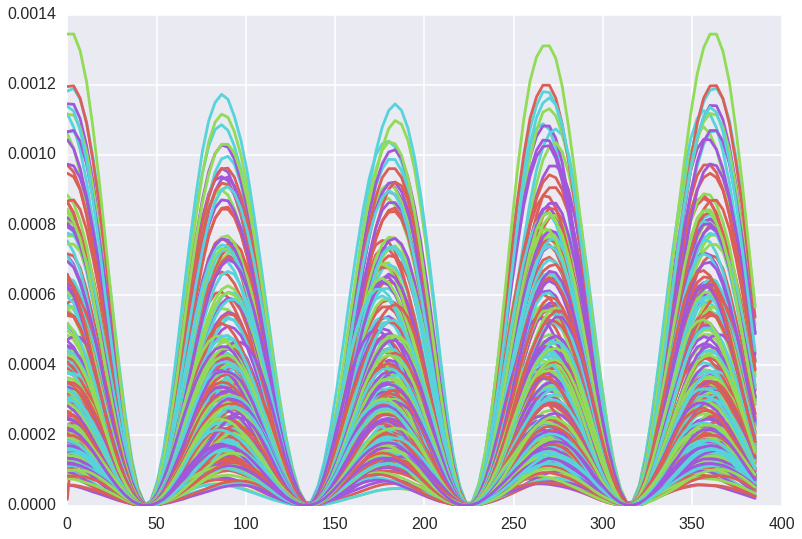

In [12]:
_=plot(hwp_degrees,z[0,0,:,:])

In [13]:
z[~np.isfinite(z)]=0

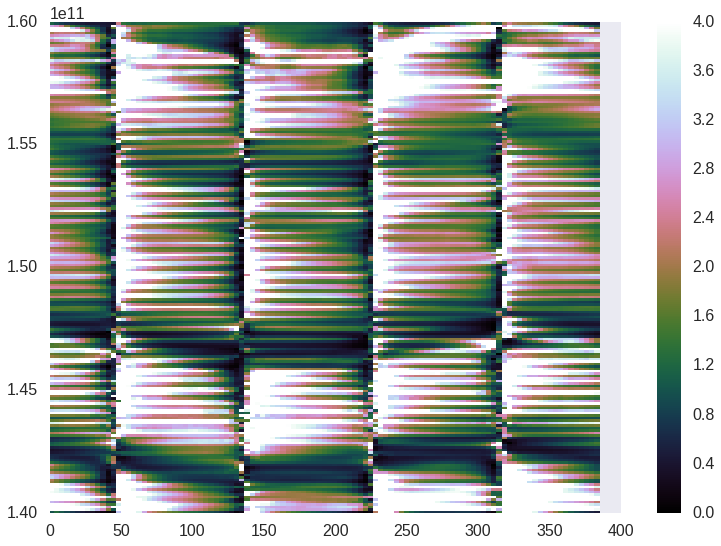

In [14]:
pcolormesh(hwp_degrees,mmw_frequency,(z[1,0,...]/z[2,0,...]).T,cmap=cm.cubehelix)
colorbar()
clim(0,4)

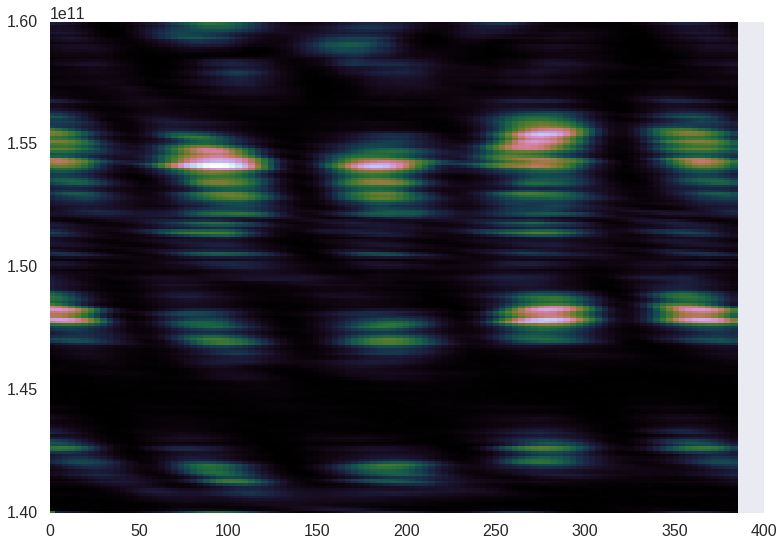

In [15]:
pcolormesh(hwp_degrees,mmw_frequency,(z[2,1,...]).T,cmap=cm.cubehelix)
#colorbar()
